# Analytical Assignment - Sean Gardner

This Jupyter notebook contains the answers to the assignment with the R code used. I set myself the challenge of completing this task using R, a language that is new to me, checking my numerical answers using Excel.

I am grateful for the following resources in learning how to complete this task using R and tidyverse packages:  
www.r-graph-gallery.com  
www.r-statistics.co  
www.stackoverflow.com  
www.tidyverse.org  


In [14]:
suppressMessages(library(tidyverse)) #import the tidyverse packages

In [15]:
#Import the Maternal BMI dataset
mbmi_dataset = read_csv("https://www.opendata.nhs.scot/dataset/df10dbd4-81b3-4bfa-83ac-b14a5ec62296/resource/690818a4-fee9-48c0-86a2-2d2b8d5eb314/download/11.3_bmi.csv")

Parsed with column specification:
cols(
  FinancialYear = col_character(),
  CA = col_character(),
  SIMDQuintile = col_double(),
  SIMDQuintileQF = col_character(),
  SIMDVersion = col_character(),
  AgeGroup = col_character(),
  BMIGroup = col_character(),
  Maternities = col_double()
)


## Question 1
How many healthy BMI maternities were there in the most deprived areas (SIMD Quintile 1) of East Ayrshire council in 2013/14, where the mother was aged 25-34?

In [16]:
#Filter the data to find healthy BMI maternities in East Ayrshire, SIMD-Q1, 2013/14, age 25-34
q1 <- filter(mbmi_dataset, FinancialYear == "2013/14", BMIGroup == "Healthy", SIMDQuintile == 1, AgeGroup == "25-34", CA == "S12000008")
#Print the answer
cat("The number of healthy maternities is",colSums(q1[,8]))

The number of healthy maternities is 77

## Question 2
How many healthy BMI maternities were there in NHS Forth Valley in 2018/19?

In [17]:
#Filter the data to find healthy BMI maternities in Forth Valley(Clackmannshire,Falkirk,Stirling), 2018/19
q2 <- filter(mbmi_dataset, FinancialYear == "2018/19", BMIGroup == "Healthy", CA %in% c("S12000005", "S12000014", "S12000030"))
#Sum the filtered rows and print the answer
cat("The number of healthy maternities is",colSums(q2[,8]))


The number of healthy maternities is 1184

## Question 3
When was this dataset (Maternal Body Mass Index (BMI) Data) last updated?

Answer: 9th April 2020

## Question 4
What percentage of maternities in Angus council area in 2018/19 had an unknown BMI?

In [18]:
#Filter for the total
angus_total <- filter(mbmi_dataset, FinancialYear == "2018/19", CA == "S12000041")
#Filter for the Unknown
angus_unknown_bmi <- filter(mbmi_dataset, FinancialYear == "2018/19", CA == "S12000041", BMIGroup == "Unknown")
#Calculate the proportion
angus_proportion <- colSums (angus_unknown_bmi[,8])/colSums (angus_total[,8])
#Find percentage and print answer
cat(round((angus_proportion*100),digits=2),"%")

65.91 %

## Question 5
In West Lothian council area in 2010/11, what percentage of maternities for women aged 35 and over did not have a healthy BMI? 

In [19]:
# Filter for total, excluding rows with Unknown BMI
wlothian_total <- filter(mbmi_dataset, FinancialYear == "2010/11", CA == "S12000040", AgeGroup == "35 and over", BMIGroup != "Unknown")
# Filter for BMI that is not Healthy or Unknown
wlothian_not_healthy <- filter(mbmi_dataset, FinancialYear == "2010/11", CA == "S12000040", AgeGroup == "35 and over", BMIGroup != "Unknown", BMIGroup != "Healthy")
#Calculate the proportion
wlothian_proportion <- colSums (wlothian_not_healthy[,8])/colSums (wlothian_total[,8])
#Find percentage and print answer
cat(round((wlothian_proportion*100),digits=2),"%")

58.7 %

## Question 6
Please chart the percentage of maternities with a healthy BMI, by age group, in Glasgow City Council area in 2018/19. 

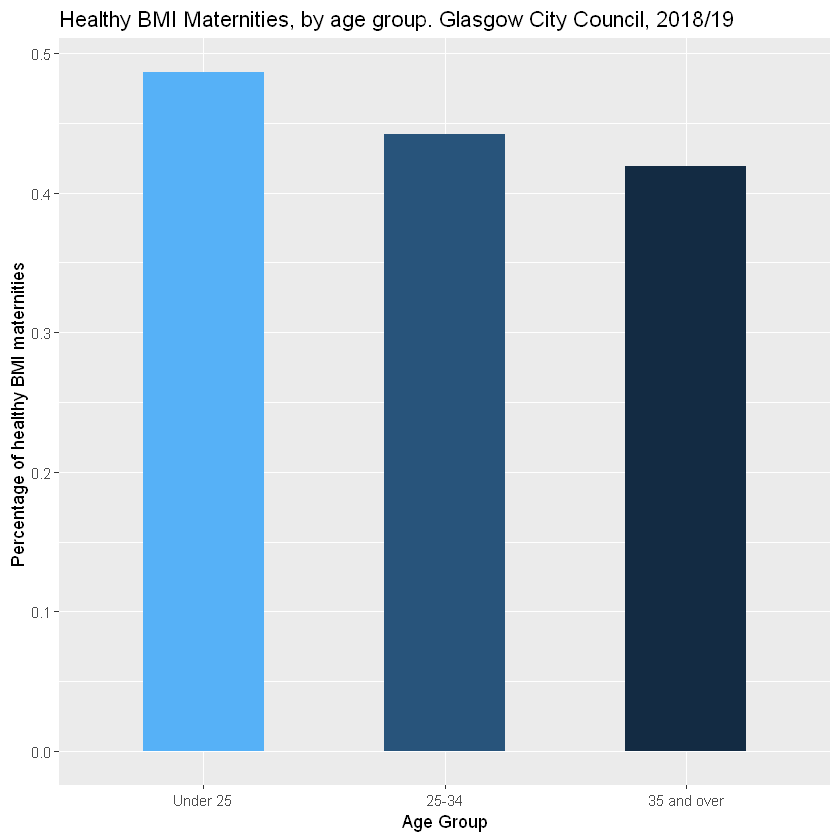

In [20]:
#Filter for total and healthy maternities for each age group
u25_total <- filter(mbmi_dataset, FinancialYear == "2018/19", CA == "S12000049", AgeGroup == "Under 25", BMIGroup != "Unknown")
u25_healthy <- filter(mbmi_dataset, FinancialYear == "2018/19", AgeGroup == "Under 25", CA == "S12000049", BMIGroup != "Unknown", BMIGroup == "Healthy")

mid_total <- filter(mbmi_dataset, FinancialYear == "2018/19", CA == "S12000049", AgeGroup == "25-34", BMIGroup != "Unknown")
mid_healthy <- filter(mbmi_dataset, FinancialYear == "2018/19", AgeGroup == "25-34", CA == "S12000049", BMIGroup != "Unknown", BMIGroup == "Healthy")

o34_total <- filter(mbmi_dataset, FinancialYear == "2018/19", CA == "S12000049", AgeGroup == "35 and over", BMIGroup != "Unknown")
o34_healthy <- filter(mbmi_dataset, FinancialYear == "2018/19", AgeGroup == "35 and over", CA == "S12000049", BMIGroup != "Unknown", BMIGroup == "Healthy")

#Calculate proportion of healthy BMI for each age group
u25_prop <- colSums (u25_healthy[,8])/colSums (u25_total[,8])
mid_prop <- colSums (mid_healthy[,8])/colSums (mid_total[,8])
o34_prop <- colSums (o34_healthy[,8])/colSums (o34_total[,8])

#Construct a dataframe for plotting
ages <- c("Under 25","25-34","35 and over")
values <- c(u25_prop,mid_prop,o34_prop)
to_plot <- data.frame(ages,values)


#Plot a bar chart
p <- ggplot(data = to_plot, aes(x=reorder(ages, -values), y=values, fill = values)) +
  geom_bar(stat="identity",width = 0.5) +
xlab("Age Group") +
ylab("Percentage of healthy BMI maternities ") +
ggtitle("Healthy BMI Maternities, by age group. Glasgow City Council, 2018/19") +
guides(fill=FALSE)
p

## Question 7
Did the total number of maternities in Scotland (as recorded in this dataset) increase or decrease between 2017/18 and 2018/19? What was the percentage change? 

In [21]:
#Find the total maternities in the two years
total_2017_18 <- filter(mbmi_dataset, FinancialYear == "2017/18")
total_2018_19 <- filter(mbmi_dataset, FinancialYear == "2018/19")
mats_in_2017_18 <- colSums (total_2017_18[,8])
mats_in_2018_19 <- colSums (total_2018_19[,8])

cat("Total maternities in 2017-18:", mats_in_2017_18)
cat("\nTotal maternities in 2018-19:", mats_in_2018_19)

# Calculate percentage change
pc_change = abs(round(((mats_in_2018_19 - mats_in_2017_18)/mats_in_2017_18 * 100),digits = 2))
cat("\nThis is a", pc_change, "% decrease.")

Total maternities in 2017-18: 51304
Total maternities in 2018-19: 49783
This is a 2.96 % decrease.

## Question 8
Focussing on 2018/19 data, give some observations on the differences in maternal BMI by deprivation (SIMD Quintile) and age group. Why is it important for NHS Scotland to monitor the BMI of expectant mothers? 

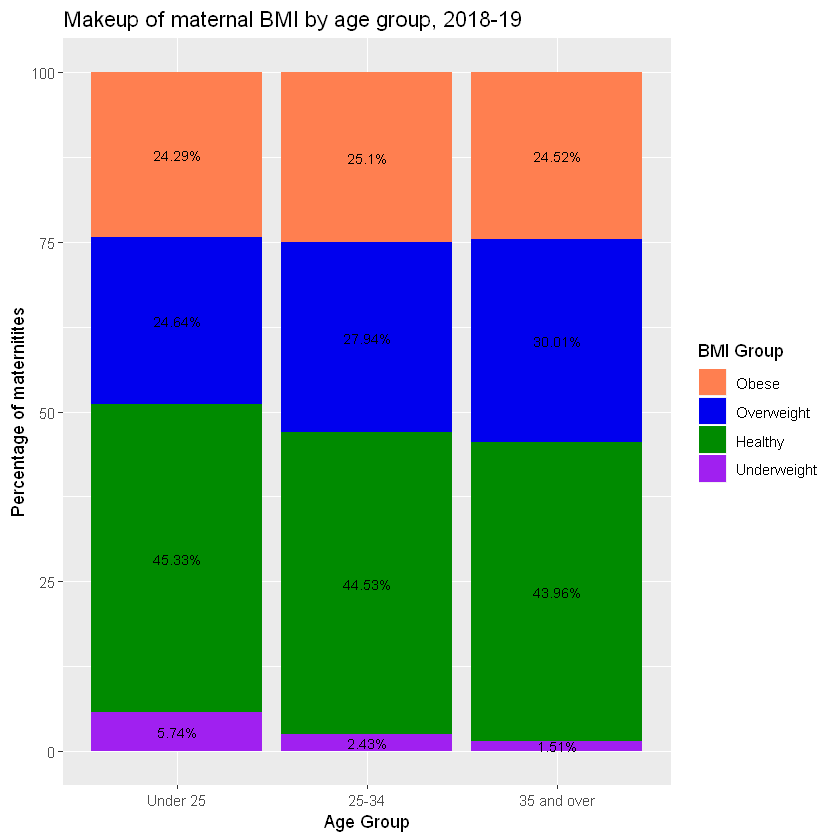

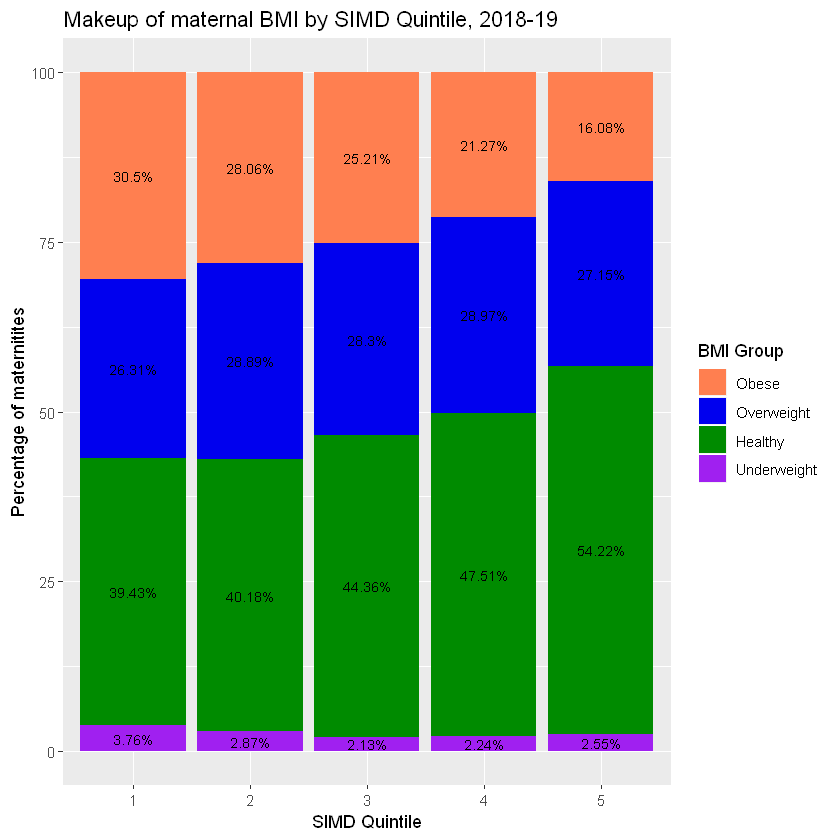

In [22]:
#Filter for relevent data
by_age <- filter(mbmi_dataset, FinancialYear == "2018/19", BMIGroup != "Unknown") %>% # use pipes (%>%)
group_by(AgeGroup,BMIGroup)%>% #group by BMI within age groups
summarise(Maternities = sum(Maternities))%>% # summerise the number of maternities for each sub-group
#Add a percentage column, showing %age of each BMI within each age group
mutate(percent = round(100*Maternities/sum(Maternities),digits = 2)) 

# put groups into a sensible order
by_age$AgeGroup <- factor(by_age$AgeGroup,levels = c("Under 25", "25-34", "35 and over"))
by_age$BMIGroup <- factor(by_age$BMIGroup,levels = c("Obese","Overweight","Healthy","Underweight"))

#plot stacked bar chart of the percentages.
ggplot(by_age, aes(fill=BMIGroup, y=percent, x=AgeGroup)) +
geom_bar(position="stack", stat="identity") + 
geom_text(aes(x = AgeGroup, y = percent, label = paste0(percent,"%")), size=3, position = position_stack(vjust = 0.5)) +
labs(title = "Makeup of maternal BMI by age group, 2018-19",
    x = "Age Group",
    y = "Percentage of maternitites",
    fill = "BMI Group") +
scale_fill_manual(values = c("coral","blue2","green4", "purple"))

# Repeat for SIMD Quartile comparison
by_SIMD <- filter(mbmi_dataset, FinancialYear == "2018/19", BMIGroup != "Unknown", SIMDQuintile !="NA") %>%
group_by(SIMDQuintile,BMIGroup)%>%
summarise(Maternities = sum(Maternities))%>%
mutate(percent1 = round(100*Maternities/sum(Maternities),digits = 2))

by_SIMD$SIMDQuintile <- factor(by_SIMD$SIMDQuintile,levels = c("1", "2", "3", "4", "5"))
by_SIMD$BMIGroup <- factor(by_SIMD$BMIGroup,levels = c("Obese","Overweight","Healthy","Underweight"))

ggplot(by_SIMD, aes(fill=BMIGroup, y=percent1, x=SIMDQuintile)) +
geom_bar(position="stack", stat="identity") + 
geom_text(aes(x = SIMDQuintile, y = percent1, label = paste0(percent1,"%")), 
          size=3, position = position_stack(vjust = 0.5)) + 
labs(title = "Makeup of maternal BMI by SIMD Quintile, 2018-19",
    x = "SIMD Quintile",
    y = "Percentage of maternitites",
    fill = "BMI Group") +
scale_fill_manual(values = c("coral","blue2","green4", "purple"))

Underweight maternities are most common in the Under 25 age group, and least common in the ‘35 and over’ age group. In contrast, the proportion of overweight maternities was higher in the older age groups. The proportion of obese maternities showed little variance between age groups.

The proportion of healthy BMI maternities increases as deprivation decreases, with an increase of more than 14% from SIMD-Q1 (most deprived) to SIMD-Q5 (least deprived). The percentage of obese maternities decreases in this direction. 

Unhealthy maternal BMI is associated with pregnancy complications, as well as adverse effects on children’s long-term health, and economic consequences for the health service. Monitoring maternal BMI allows NHS Scotland to target health improvement activities towards those at highest risk, and evaluate the effect of weight loss interventions at a population level.
